## Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Import data

In [2]:
delivery_time = pd.read_csv('delivery_time.csv')
delivery_time

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


## Data Understanding

### Intial Analysis

In [3]:
delivery_time.shape

(21, 2)

In [4]:
delivery_time.isna().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [5]:
delivery_time.dtypes

Delivery Time    float64
Sorting Time       int64
dtype: object

## Assumption check

### 1. Linearity Check

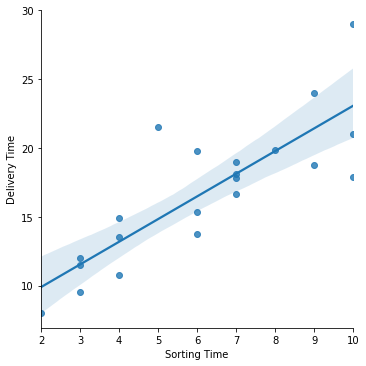

In [6]:
sns.lmplot(x='Sorting Time',y='Delivery Time',data=delivery_time)
plt.show()

### Normality Check

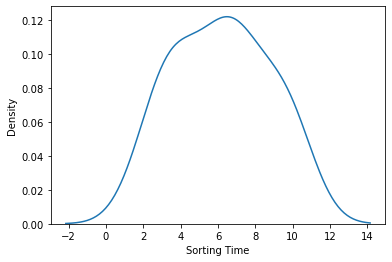

In [7]:
sns.distplot(a=delivery_time['Sorting Time'],hist=False)
plt.show()

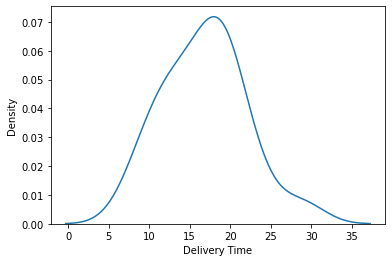

In [8]:
sns.distplot(a=delivery_time['Delivery Time'],hist=False)
plt.show()

In [9]:
delivery_time.skew()

Delivery Time    0.352390
Sorting Time     0.047115
dtype: float64

## Model Building

In [10]:
import statsmodels.formula.api as smf

In [11]:
x=delivery_time[['Sorting Time']]
y=delivery_time[['Delivery Time']]

In [12]:
x

,Sorting Time
0,10
1,4
2,6
3,9
4,10
5,6
6,7
7,3
8,10
9,9


In [13]:
y

,Delivery Time
0,21.00
1,13.50
2,19.75
3,24.00
4,29.00
5,15.35
6,19.00
7,9.50
8,17.90
9,18.75


In [14]:
Linear_model = smf.ols(formula='y~x',data=delivery_time).fit()

In [15]:
Linear_model.params

Intercept    6.582734
x            1.649020
dtype: float64

The value of slope is 1.649

The value of intecept is 6.582

## Model Evaluation

In [16]:
y_pred = Linear_model.predict(x)

In [17]:
from sklearn.metrics import mean_squared_error,r2_score
print('mean squared error is ',mean_squared_error(y,y_pred))
print('r2 score is ',r2_score(y,y_pred))

mean squared error is  7.793311548584062
r2 score is  0.6822714748417231


### Taking Log Transformation

In [18]:
log_x = np.log(delivery_time[['Sorting Time']])

In [19]:
frames = [log_x,y]
log_model = pd.concat(frames,axis=1)
log_model

,Sorting Time,Delivery Time
0,2.302585,21.00
1,1.386294,13.50
2,1.791759,19.75
3,2.197225,24.00
4,2.302585,29.00
5,1.791759,15.35
6,1.945910,19.00
7,1.098612,9.50
8,2.302585,17.90
9,2.197225,18.75


In [20]:
Linear_model_1 = smf.ols(formula='y~log_x',data=log_model).fit()
Linear_model_1

In [21]:
Linear_model_1.params

Intercept    1.159684
log_x        9.043413
dtype: float64

### Model Prediction

In [22]:
y_pred_1 = Linear_model_1.predict(log_x)

In [23]:
from sklearn.metrics import mean_squared_error,r2_score
print('mean squared error is ',mean_squared_error(y,y_pred_1))
print('r2 score is ',r2_score(y,y_pred_1))

mean squared error is  7.470226320948425
r2 score is  0.6954434611324223


### Taking Sqrt Transformation

In [24]:
sqrt_x = np.sqrt(delivery_time[['Sorting Time']])

In [25]:
frames = [sqrt_x,y]
sqrt_model = pd.concat(frames,axis=1)
sqrt_model

,Sorting Time,Delivery Time
0,3.162278,21.00
1,2.000000,13.50
2,2.449490,19.75
3,3.000000,24.00
4,3.162278,29.00
5,2.449490,15.35
6,2.645751,19.00
7,1.732051,9.50
8,3.162278,17.90
9,3.000000,18.75


In [26]:
Linear_model_2 = smf.ols(formula='y~sqrt_x',data=log_model).fit()
Linear_model_2

In [28]:
Linear_model_2.params

Intercept   -2.518837
sqrt_x       7.936591
dtype: float64

In [31]:
y_pred_2 = Linear_model_2.predict(sqrt_x)

In [32]:
print('mean squared error is ',mean_squared_error(y,y_pred_2))
print('r2 score is ',r2_score(y,y_pred_2))

mean squared error is  7.461328308595394
r2 score is  0.6958062276308671


### Taking Square Transformation

In [33]:
square_x = np.sqrt(delivery_time[['Sorting Time']])

In [34]:
frames = [square_x,y]
square_model = pd.concat(frames,axis=1)
square_model

,Sorting Time,Delivery Time
0,3.162278,21.00
1,2.000000,13.50
2,2.449490,19.75
3,3.000000,24.00
4,3.162278,29.00
5,2.449490,15.35
6,2.645751,19.00
7,1.732051,9.50
8,3.162278,17.90
9,3.000000,18.75


In [35]:
Linear_model_3 = smf.ols(formula='y~sqrt_x',data=log_model).fit()
Linear_model_3

In [36]:
Linear_model_3.params

Intercept   -2.518837
sqrt_x       7.936591
dtype: float64

In [37]:
y_pred_3 = Linear_model_3.predict(sqrt_x)

In [38]:
print('mean squared error is ',mean_squared_error(y,y_pred_3))
print('r2 score is ',r2_score(y,y_pred_3))

mean squared error is  7.461328308595394
r2 score is  0.6958062276308671


### Observation

From the above Models, original model is better model than the Transformed model